## Create Tools


In [54]:
##Tools
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [55]:
#create Arxiv tool
arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper, description="Query Arxiv papers")
print(arxiv.name)

arxiv


In [56]:
arxiv.invoke("Quantum computing")

'Published: 2022-08-01\nTitle: The Rise of Quantum Internet Computing\nAuthors: Seng W. Loke\nSummary: This article highlights quantum Internet computing as referring to\ndistributed quantum computing over the quantum Internet, analogous to\n(classical) Internet computing involving (classical) distributed computing over\nthe (classical) Internet. Relevant to quantum Internet computing would be areas\nof study such as quantum protocols for distributed nodes using quantum\ninformation for computations, qua'

In [57]:
#create Wikipedia tool
wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_api_wrapper, description="Querry wikipedia")
print(wiki.name)

wikipedia


In [58]:
wiki.invoke("MS Dhoni")

'Page: MS Dhoni\nSummary: Mahendra Singh Dhoni ( ; born 7 July 1981) is an Indian professional cricketer who plays as a right-handed batter and a wicket-keeper. Widely regarded as one of the most prolific wicket-keeper batsmen and captains and one of the greatest ODI batsmen, he represented the Indian cricket team and was the captain of the side in limited overs formats from 2007 to 2017 and in test cricket from 2008 to 2014. Dhoni has captained the most international matches and is the most succe'

In [59]:
from dotenv import load_dotenv
import os

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

##to reload .env file after making changes
### load_dotenv(override=True)

In [60]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [61]:
tavily.invoke("What is latest news on Pahalgam attack?")

[{'title': 'Pahalgam attack news live updates: Air Chief Marshal meets PM ...',
  'url': 'https://www.hindustantimes.com/india-news/pahalgam-attack-news-live-updates-pm-modi-indian-pak-army-loc-ceasefire-violation-abdali-missile-test-trade-ban-101746319148531.html',
  'content': "Pahalgam attack news live updates: India shuts out Pakistan entirely after Pahalgam attack\n\nNew Delhi's latest retaliation completely blocks out Pakistan as it unveiled punitive economic measures against the neighbouring country, banning the import of all goods originating there, prohibiting Pakistan-flagged vessels calling at Indian ports, and stopping the exchange of mail and parcels by land and air routes. [...] “…Whatever action the government takes, we are with them, but what they will do and when, they need to say that,” Owaisi was quoted as saying by ANI.\n\nPahalgam attack news live updates: All Pak citizens staying illegally should be identified, says Sukanta Majumdar\n\nPahalgam attack news live up

In [62]:
data = tavily.invoke("What is latest news on Pahalgam attack?")
contents = [item['content'] for item in data]
for content in contents:
    print(content)

As the gunshots rang out at Pahalgam on April 22, two terrorists who had earlier mingled with the tourists, deliberately guided the people towards two other armed assailants to prevent the crowd from scattering, say officials; the terrorists had fled into forests before the reinforcements arrived

Updated  - May 04, 2025 08:14 am IST - NEW DELHI [...] After the first gunshots were fired at the Baisaran meadow in South Kashmir’s Pahalgam on April 22, two terrorists who had earlier mingled with the tourists, herded the startled crowd towards two other armed terrorists, who then segregated and killed the people based on religion, a senior government official said on Saturday (May 3, 2025).

Twenty-five tourists and a local pony operator were killed in the terror attack.

Also read | Responding to the terror attack in Pahalgam [...] He said the Gujjar-Bakkarwal community are the ones who operate ponies in the area and it is being investigated if they noticed any outsiders days before the a

## Combine Tools

In [63]:
#combine all tools
tools = [arxiv, wiki, tavily]

## LLM

In [64]:
from langchain_groq import ChatGroq

llm = ChatGroq(model = "qwen-qwq-32b")

In [65]:
llm.invoke("What is throngs?")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is throngs?" Let me start by recalling what I know about the word "throngs." I think it\'s a noun, and it refers to a large crowd of people. But I should make sure I\'m accurate here.\n\nFirst, I should check the definition. "Throngs" is the plural of "throng," which means a dense crowd or a large number of people gathered together. It\'s often used in a literary or descriptive context to emphasize the size and perhaps the movement of the crowd. \n\nWait, maybe I should confirm if there are other meanings. Sometimes words can have different definitions depending on context. But I believe in most cases, "throngs" refers to crowds. Let me think of example sentences. Like, "Throngs of people gathered in the广场 to watch the parade." That makes sense. \n\nAre there any synonyms? Crowds, masses, gatherings, assemblages. But "throng" specifically implies a pressing or dense group. Maybe it\'s used more in writing than in everyday sp

In [ ]:
#to reload .env
# load_dotenv(override=True)

True

## Binding tools with LLM

In [66]:
#bind tools with LLM

llm_with_tools = llm.bind_tools(tools=tools)

In [67]:
llm_with_tools.invoke("Research paper on AI")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_epxy', 'function': {'arguments': '{"query": "AI"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 175, 'prompt_tokens': 319, 'total_tokens': 494, 'completion_time': 0.393132165, 'prompt_time': 0.020703355, 'queue_time': 0.26930491500000003, 'total_time': 0.41383552}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--32cdb00b-520f-4cbb-86c2-3c70d1b3a77b-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI'}, 'id': 'call_epxy', 'type': 'tool_call'}], usage_metadata={'input_tokens': 319, 'output_tokens': 175, 'total_tokens': 494})

In [68]:
llm_with_tools.invoke("What is Machine Learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yftq', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 289, 'prompt_tokens': 320, 'total_tokens': 609, 'completion_time': 0.700262766, 'prompt_time': 0.018022413, 'queue_time': 0.276268179, 'total_time': 0.718285179}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd0d7225-2551-431c-95ed-4fc229315b5e-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_yftq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 320, 'output_tokens': 289, 'total_tokens': 609})

## WorkFlow

In [69]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage, HumanMessage #Human msg or AI msg
from typing import Annotated #labelling
from langgraph.graph.message import add_messages #reducers-append messages 

In [70]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [71]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

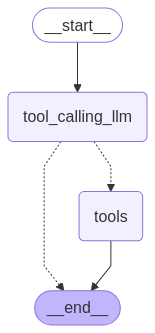

In [72]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [73]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_rxhz)
 Call ID: call_rxhz
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [74]:
messages=graph.invoke({"messages":"Hi My name is Raj"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Raj
================================== Ai Message ==================================

Hi Raj! Nice to meet you. How can I assist you today? Let me know if you have any questions or need help with anything! 😊


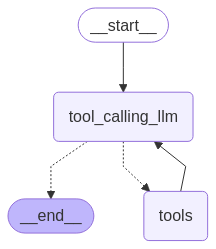

In [75]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

#build nodes
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#build edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools","tool_calling_llm")
#goes to END automatically


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [76]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_4gh4)
 Call ID: call_4gh4
  Args:
    query: recent AI news
  arxiv (call_nsj2)
 Call ID: call_nsj2
  Args:
    query: quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Artificial Intelligence News - ScienceDaily", "url": "https://www.sciencedaily.com/news/computers_math/artificial_intelligence/", "content": "Artificial Intelligence News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nTuesday, April 8, 2025\n\nThursday, April 3, 2025\n\nThursday, March 27, 2025\n\nWednesday, March 26, 2025\n\nTuesday, March 25, 2025\n\nWednesday, March 19, 2025\n\nTuesday, March 18, 2025\n\nMo